In [44]:
#!pip install chart-studio
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py 
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)

In [45]:
df=pd.read_csv("ADANIPORTS.CSV")

In [46]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [48]:
adani=df.loc[:,["Date","Open","High","Low","Close","Volume"]]  

In [49]:
adani.head()

,Date,Open,High,Low,Close,Volume
0,2007-11-27,770.00,1050.00,770.0,962.90,27294366
1,2007-11-28,984.00,990.00,874.0,893.90,4581338
2,2007-11-29,909.00,914.75,841.0,884.20,5124121
3,2007-11-30,890.00,958.00,890.0,921.55,4609762
4,2007-12-03,939.75,995.00,922.0,969.30,2977470


In [50]:
adani['Date']=pd.to_datetime(adani['Date'])

In [51]:
print(f'range of date {adani.Date.min()} {adani.Date.max()}')
print(f'total days={(adani.Date.max()-adani.Date.min()).days} days')

range of date 2007-11-27 00:00:00 2021-04-30 00:00:00
total days=4903 days


In [52]:
adani.describe()

,Open,High,Low,Close,Volume
count,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03
mean,344.763019,351.608007,337.531969,344.201626,2.954564e+06
std,193.619992,198.617808,188.676614,193.045886,4.104227e+06
min,108.000000,110.450000,105.650000,108.000000,1.236600e+04
25%,164.850000,168.000000,161.600000,164.312500,7.493682e+05
50%,325.750000,331.275000,319.850000,324.700000,2.007292e+06
75%,401.000000,407.187500,395.000000,400.912500,3.636883e+06
max,1310.250000,1324.000000,1270.000000,1307.450000,9.771788e+07


<AxesSubplot:>

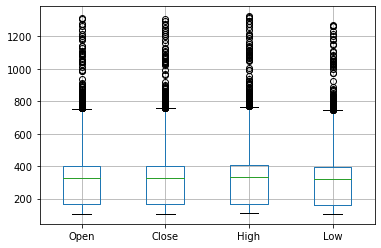

In [53]:
adani.boxplot(column=['Open','Close','High','Low'],grid=True)


In [54]:
layout = go. Layout (
    title='Stock Prices of adani', 
    xaxis=dict (
        title= 'Date',
        titlefont=dict(
        family='Courier New, monospace', 
            size=18,
            
        )
    ), 
    yaxis=dict(
       title='Price',
        titlefont=dict(
            family='Courier New, monospace', 
            size=18, 
           
        )
    )
)

adani_d=[{'x':adani['Date'],'y':adani['Close']}]
plot=go.Figure(data=adani_d,layout=layout)

In [55]:
iplot(plot)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler




In [57]:
X=np.array(adani.index).reshape(-1,1)
y=adani["Close"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [58]:
scaler=StandardScaler().fit(X_train)

In [59]:
lr =LinearRegression() 

In [60]:
lr.fit(X_train,y_train)


LinearRegression()

In [61]:
prediction =lr.predict(X_test)

In [62]:
trace0 = go.Scatter(
x = X_train.T[0],
y = y_train,
mode = 'markers',
name = 'Actual'
)
trace1 = go.Scatter (
x = X_train.T[0],
y = lr.predict(X_train).T,
mode = 'lines',
name = 'Predicted'
)
adani_d = [trace0, trace1]
layout.xaxis.title.text = 'Day'
iplot2 = go.Figure(data=adani_d, layout=layout)

In [63]:
iplot(iplot2)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [65]:
print('mean_squared_error : ', mean_squared_error(y_test, prediction))

print('r2 : ', r2_score(y_test, prediction))


mean_squared_error :  35472.81176717142
r2 :  0.03326159720485544


In [66]:
#!pip install pmdarima

In [67]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

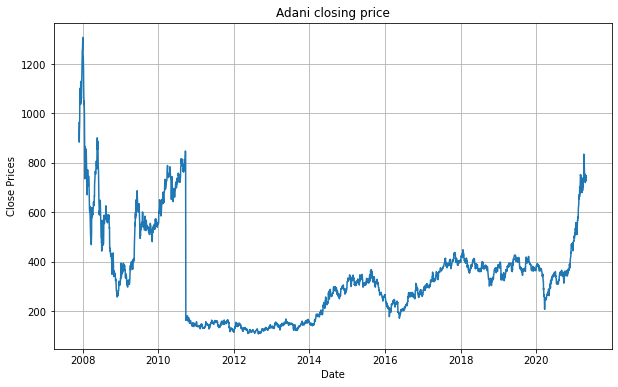

In [68]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(adani['Date'],adani['Close'])
plt.title('Adani closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

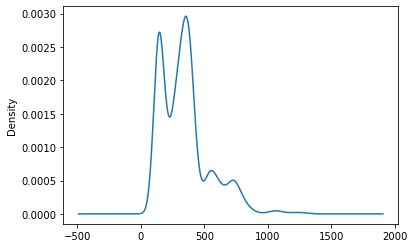

In [69]:
#Distribution of the dataset
df_close = adani['Close']
df_close.plot(kind='kde')

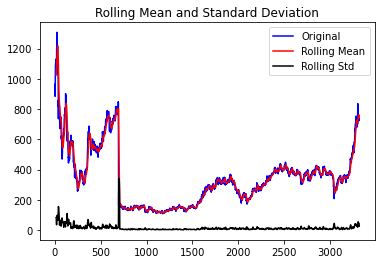

Results of dickey fuller test
Test Statistics                  -3.473098
p-value                           0.008705
No. of lags used                  5.000000
Number of observations used    3316.000000
critical value (1%)              -3.432324
critical value (5%)              -2.862412
critical value (10%)             -2.567234
dtype: float64


In [70]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(14).mean()
    rolstd = timeseries.rolling(14).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


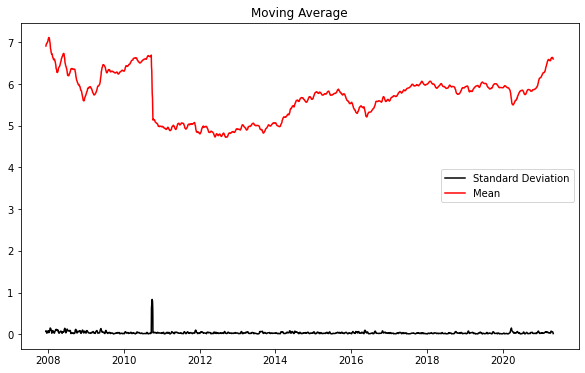

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(adani['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
x=adani['Date']
plt.plot(x,std_dev, color ="black", label = "Standard Deviation")
plt.plot(x,moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

2989    5.902633
2990    5.933968
2991    5.948427
2992    5.946729
2993    5.940697
          ...   
3317    6.594071
3318    6.618939
3319    6.615061
3320    6.615730
3321    6.593113
Name: Close, Length: 333, dtype: float64

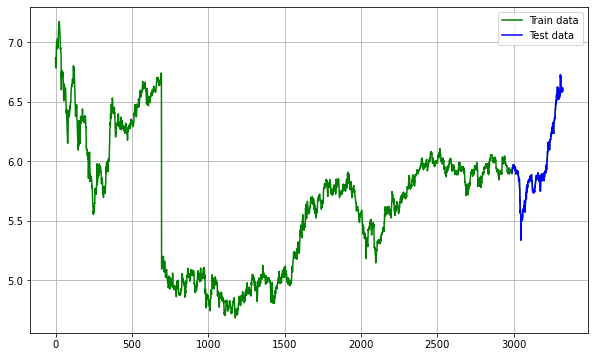

In [72]:
#split data into train and training set
train_data, test_data = df_log[1:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)


plt.plot(df_log, color='green', label='Train data')
plt.plot(test_data,color= 'blue', label='Test data')
plt.legend()
test_data

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10764.514, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10762.808, Time=0.73 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10762.804, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10766.346, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10760.788, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.210 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2988
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5384.173
Date:                Sat, 02 Dec 2023   AIC                         -10766.346
Time:                        23:36:04   BIC                         -10760.344
Sample:                             0   HQIC                        -10764.186
                               - 2988                             

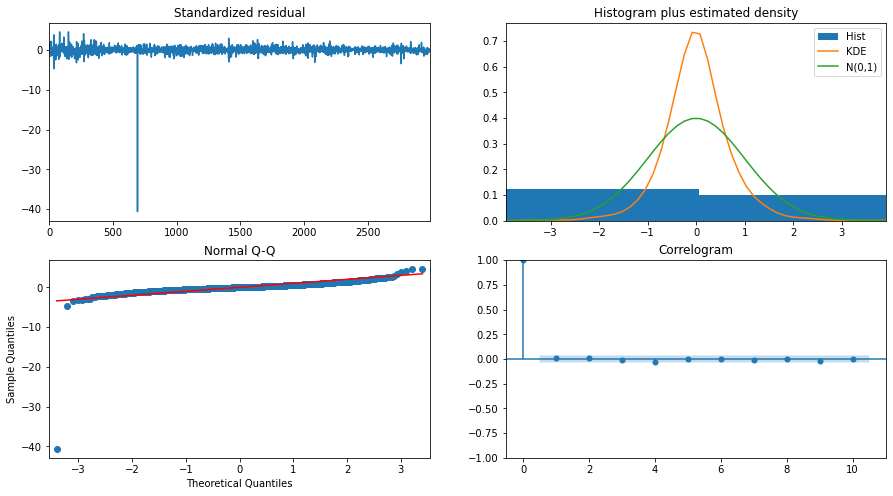

In [73]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=10,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [74]:
import statsmodels.api as sm

#Modeling
# Build Model
model = sm.tsa.arima.ARIMA(train_data, order=(2,1,3))
fitted = model.fit()

print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2988
Model:                 ARIMA(2, 1, 3)   Log Likelihood                5385.217
Date:                Sat, 02 Dec 2023   AIC                         -10758.435
Time:                        23:36:06   BIC                         -10722.422
Sample:                             0   HQIC                        -10745.478
                               - 2988                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4168      1.089      0.383      0.702      -1.718       2.552
ar.L2         -0.3166      1.170     -0.271      0.787      -2.610       1.977
ma.L1         -0.4075      1.090     -0.374      0.7

In [75]:
 result=fitted.forecast(333, alpha=0.05)

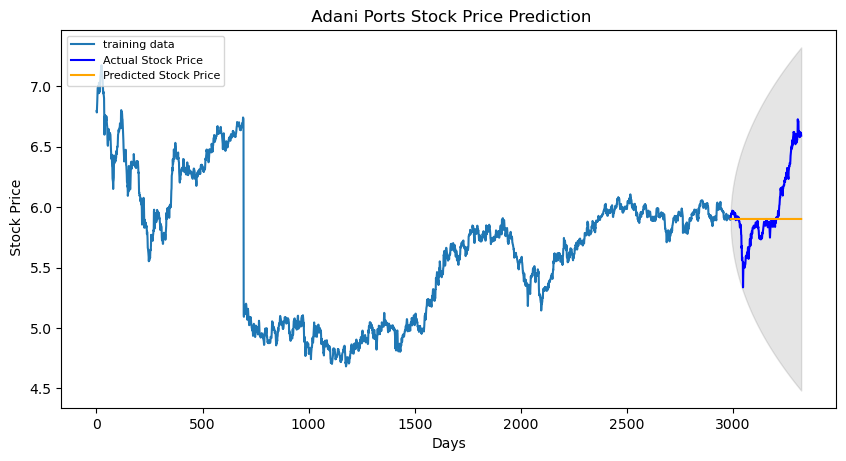

In [76]:
conf_ins = fitted.get_forecast(333).summary_frame()
hist=2989


# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(result, color = 'orange',label='Predicted Stock Price')
plt.fill_between(test_data.index,conf_ins['mean_ci_lower'],conf_ins['mean_ci_upper'], 
                 color='k', alpha=.10)

plt.title(' Adani Ports Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel(' Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [77]:
mse = mean_squared_error(test_data, result)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, result)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, result))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(result - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.10329954926128003
MAE: 0.22599451485264857
RMSE: 0.32140247239447306
MAPE: 0.036518593442856996
